In [1]:
import matplotlib.pyplot as plt

from thgsp.alg import dsatur
from thgsp.datasets import Minnesota
from thgsp.filters import ColorQmf
from thgsp.utils import mse, snr
from thgsp.visual import draw, draw_cn

data = Minnesota(download=True, connected=True)
minne = data[0]
print(minne)

100%|██████████████████████████████████████████████████████████████████████████████| 11.8M/11.8M [00:05<00:00, 2.21MB/s]


Extracting /home/dengbw/projects/thgsp/thgsp/datasets/data/Graph_Wavelets_Demo.zip to /home/dengbw/projects/thgsp/thgsp/datasets/data
Graph(row=tensor([   0,    1,    2,  ..., 2639, 2640, 2641]),
      col=tensor([   6,   16,    3,  ..., 2598, 2606, 2584]),
      val=tensor([1., 1., 1.,  ..., 1., 1., 1.], dtype=torch.float64),
      size=(2642, 2642), nnz=6608, density=0.09%)


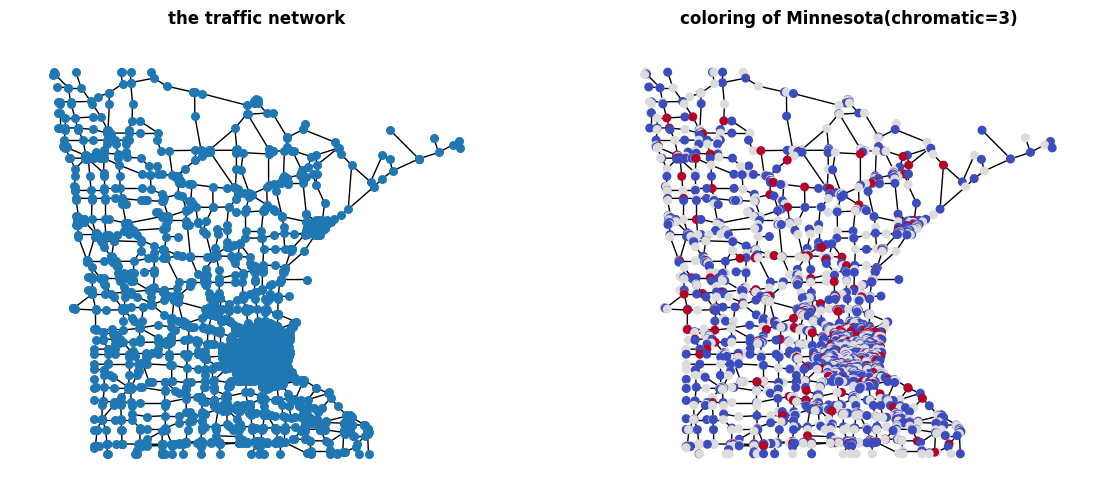

In [2]:
colors = dsatur(minne)
fig, axes = plt.subplots(1, 2, figsize=(2 * 7, 6))
draw(minne, minne.coords, ax=axes[0], node_size=30, with_labels=False)
axes[0].set_title("the traffic network", fontsize="large", fontweight="bold")
draw_cn(minne, minne.coords, colors, ax=axes[1], node_size=30, with_labels=False)
axes[1].set_title(
    "coloring of Minnesota(chromatic={})".format(str(colors.max() + 1)),
    fontsize="large",
    fontweight="bold",
)
plt.show()

In [3]:

# ===> continue the last code block
K = 30  # the order of Chebyshev approximation
qmf = ColorQmf(minne, order=K, vtx_color=colors)
f = data.f.float()  # (2642,) The signal
wc = qmf.analyze(f)  # analyze,            i.e., wavelet transform
f4_hat = qmf.synthesize(wc)  # synthesize,         i.e., inverse transform
f_hat = f4_hat.sum(0).squeeze()  # (4,2642,1)--> (2642,1) --> (2642)

# ===> continue the last code block


MSE = mse(f_hat, f).item()
SNR = snr(f_hat, f).item()
print(
    "==============================> SUMMARY <========================================="
)
print(f"|Mean Square Error :  {MSE:.3e}")
print(f"|Reconstruction SNR: {SNR: .3f}")

dis = (f_hat - f).abs()
print(f"|Max distortion    :  {dis.max().item():.3e} at {dis.argmax():4d}-th node")
print(f"|Min distortion    :  {dis.min().item():.3e} at {dis.argmin():4d}-th node")
print(
    "==============================> SUMMARY <========================================="
)


==============================> SUMMARY <=========================================
|Mean Square Error :  5.022e-07
|Reconstruction SNR:  62.992
|Max distortion    :  1.770e-03 at  918-th node
|Min distortion    :  2.251e-07 at 1715-th node
==============================> SUMMARY <=========================================
